# EDA

In [1]:
import pandas as pd
import numpy as np

# Display the word cloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import seaborn as sns


from wordcloud import WordCloud, STOPWORDS

from nltk.probability import FreqDist

In [2]:
df=pd.read_csv("data/df.csv")

## The distribution of Labels

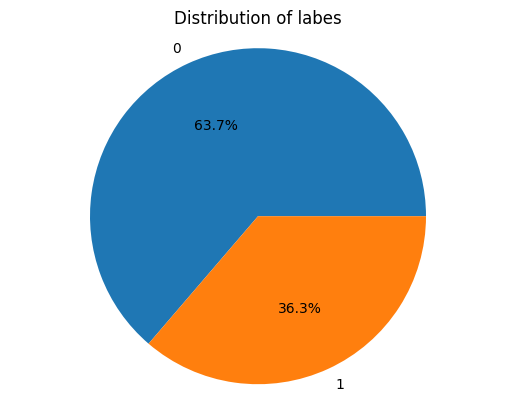

In [3]:
labes = df['label'].value_counts()

# Plotting pie chart
plt.pie(labes.values, labels=labes.index, autopct='%1.1f%%')
plt.title('Distribution of labes')

# Ensuring the pie chart is displayed as a circle
plt.axis('equal')

# Displaying the pie chart
plt.show()

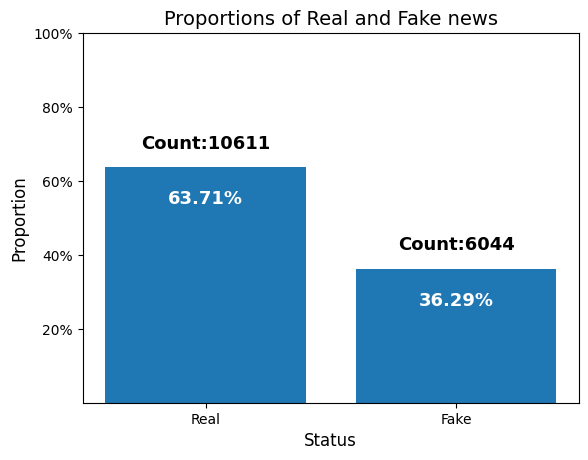

In [4]:
# Calculate the proportions
plot_dataseries = round(df["label"].value_counts(normalize=True) * 100, 2)

# Plot the bar chart
plt.bar(plot_dataseries.index, plot_dataseries.values)

# Add data labels and count labels
for x, y in enumerate(plot_dataseries):
    plt.text(x, y-10, f"{y}%", color="white", fontweight=700, fontsize=13, ha="center")
    plt.text(x, y+5, f"Count:{df['label'].value_counts()[x]}", fontweight=700, fontsize=13, ha="center")

# Set plot title and labels
plt.title("Proportions of Real and Fake news", fontsize=14)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks(ticks=range(2), labels=["Real", "Fake"])
plt.yticks(ticks=[20, 40, 60, 80, 100], labels=["20%", "40%", "60%", "80%", "100%"])

plt.show()

In [5]:
def length(text):    
    '''a function which returns the length of text'''
    return len(text)

In [41]:
df['length'] = df['content'].apply(length)

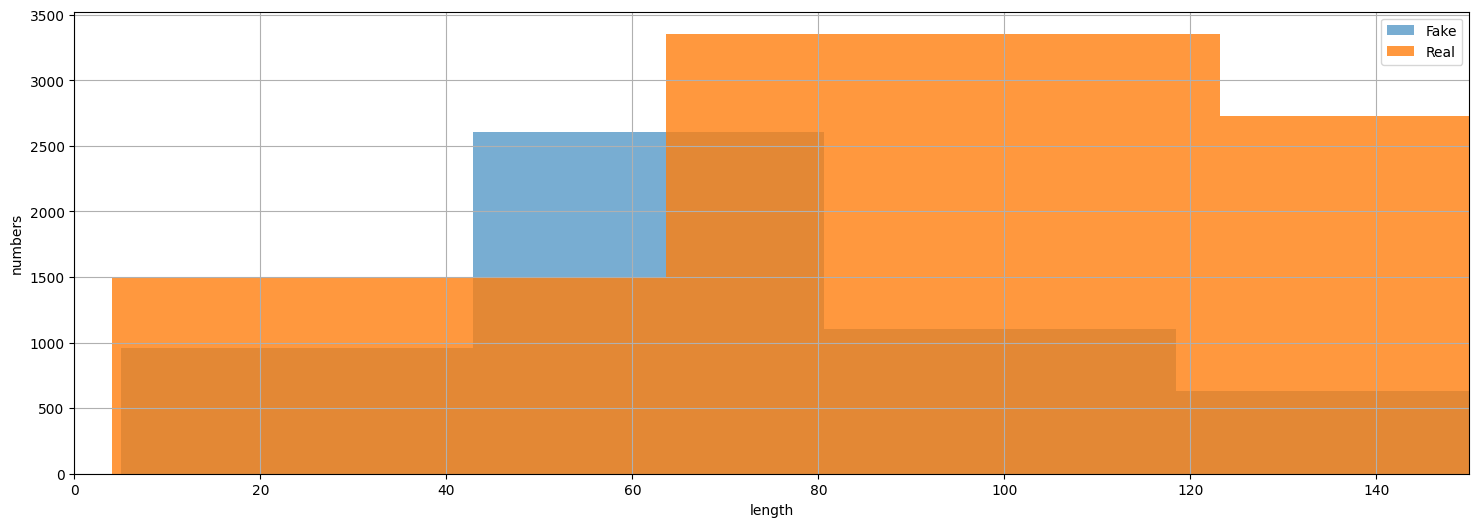

In [44]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.hist(df[df['label'] == 1]['length'], alpha = 0.6, bins=bins, label='Fake')
plt.hist(df[df['label'] == 0]['length'], alpha = 0.8, bins=bins, label='Real')
plt.xlabel('length')
plt.ylabel('numbers')
plt.legend(loc='upper right')
plt.xlim(0,150)
plt.grid()
plt.show()

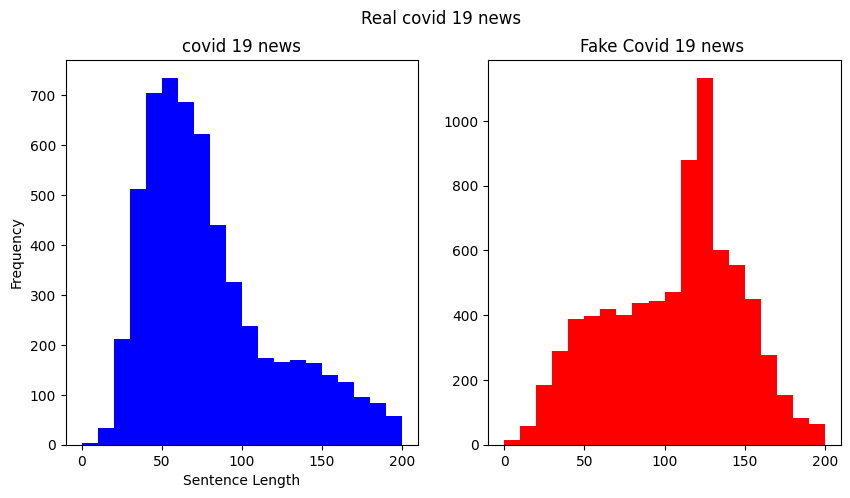

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['label']==1]['content'].str.len()
ax1.hist(tweet_len,color='blue',bins=range(0, 201, 10))
ax1.set_title('covid 19 news')
ax1.set_xlabel('Sentence Length')
ax1.set_ylabel('Frequency')

tweet_len=df[df['label']==0]['content'].str.len()
ax2.hist(tweet_len, color='red', bins=range(0, 201, 10)) 
ax2.set_title('Fake Covid 19 news ')
fig.suptitle('Real covid 19 news')
plt.show()

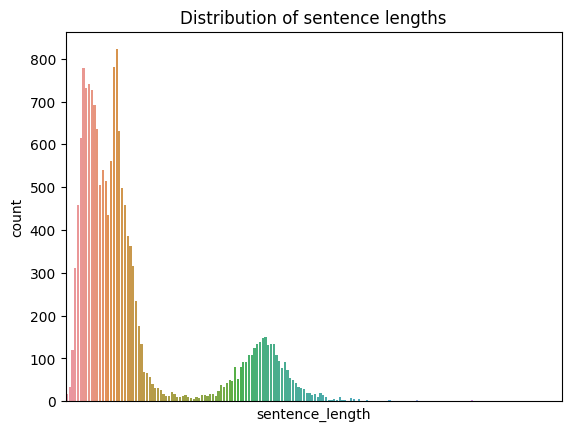

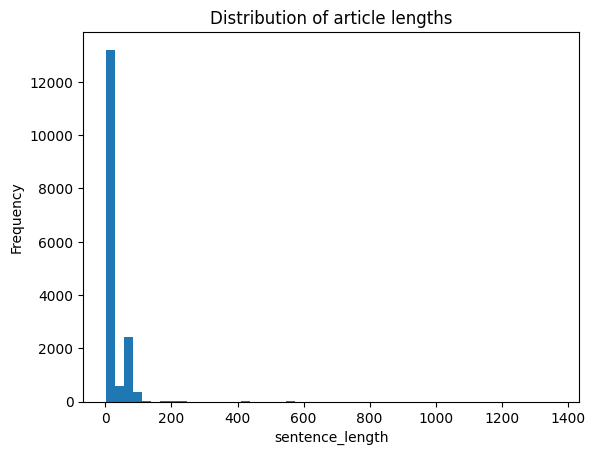

In [15]:
df['sentence_length'] = df['content'].apply(lambda x: len(x.split()))


sns.countplot(x="sentence_length", data=df)
plt.xticks([])
plt.title('Distribution of sentence lengths')
plt.show()


plt.hist(df['sentence_length'], bins=50)
plt.xlabel('sentence_length')
plt.ylabel('Frequency')
plt.title('Distribution of article lengths')
plt.show()

C:\Users\kylec\AppData\Local\Temp\ipykernel_39272\192128400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_content,ax=ax,color='pink')


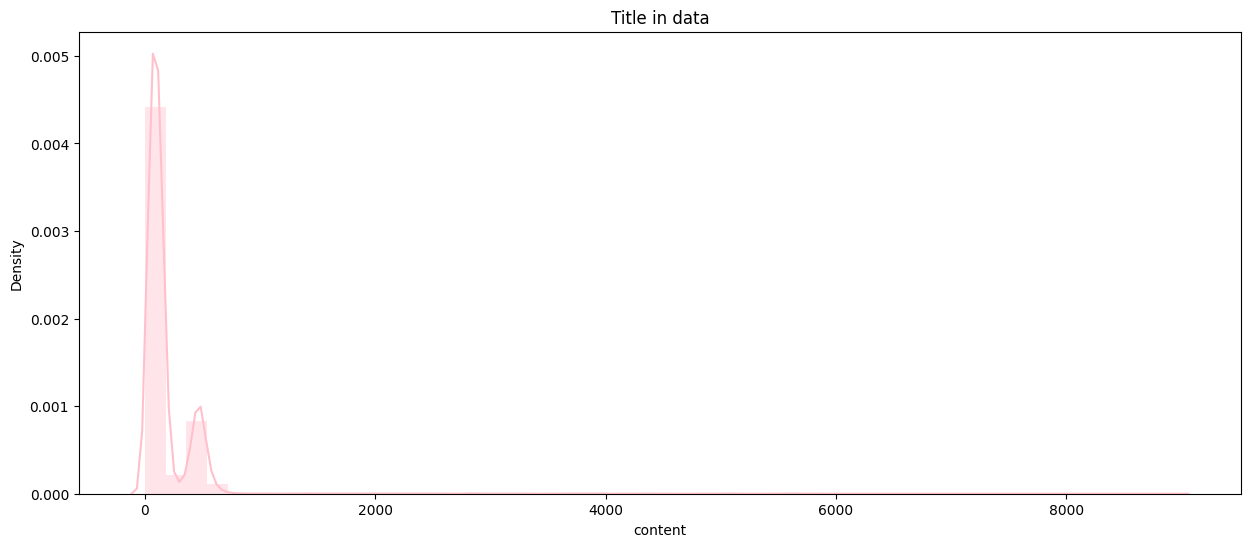

In [6]:
df_content=df['content'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.distplot(df_content,ax=ax,color='pink')
ax.set_title('Title in data')
plt.show()

C:\Users\kylec\AppData\Local\Temp\ipykernel_39272\3789701772.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_title_0,ax=ax[0],color='pink')
C:\Users\kylec\AppData\Local\Temp\ipykernel_39272\3789701772.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_title_1,ax=ax[1],color='orange')


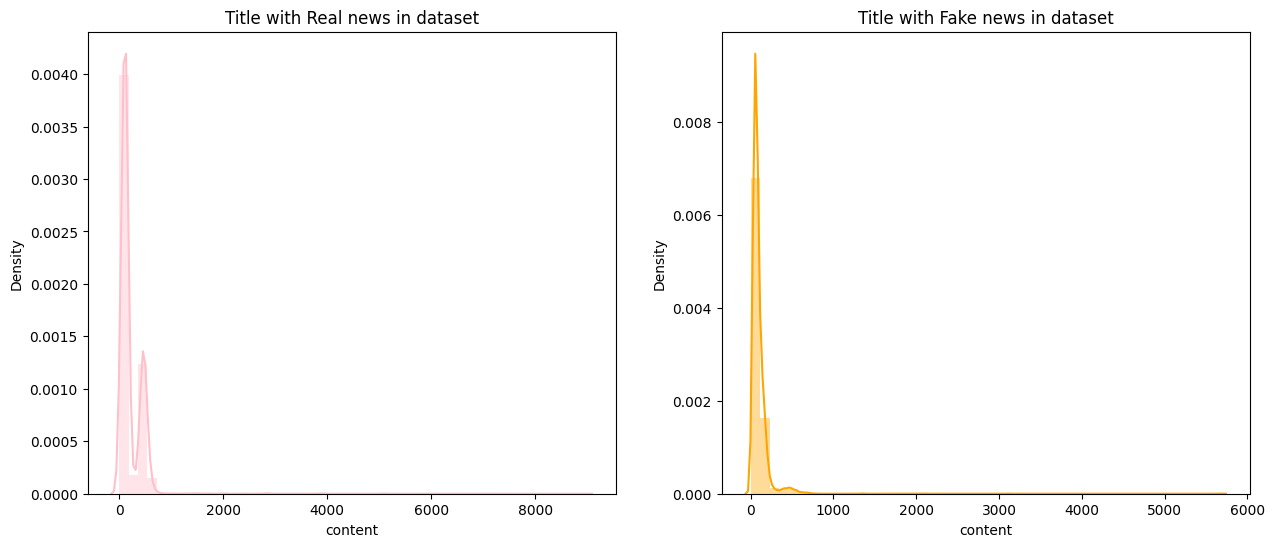

In [7]:
df_title_0=df['content'][df['label']==0].str.len()
df_title_1=df['content'][df['label']==1].str.len()

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.distplot(df_title_0,ax=ax[0],color='pink')
sns.distplot(df_title_1,ax=ax[1],color='orange')

ax[0].set_title('Title with Real news in dataset')
ax[1].set_title('Title with Fake news in dataset')

plt.show()

## Word Cloud

In [9]:
def get_word_cloud(words):
    mostcommon = FreqDist(words).most_common(100)
    wordcloud = WordCloud(width=1600, height=800, background_color='white', stopwords=STOPWORDS).generate(str(mostcommon))
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [11]:
fake_data=df[df['label']==1]["content"]
true_data=df[df['label']==0]["content"]

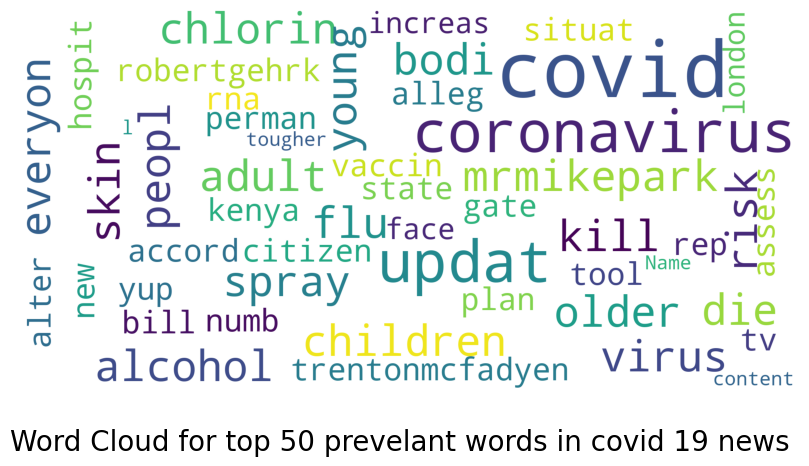

In [26]:
 word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(df['content']))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 50 prevelant words in covid 19 news', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

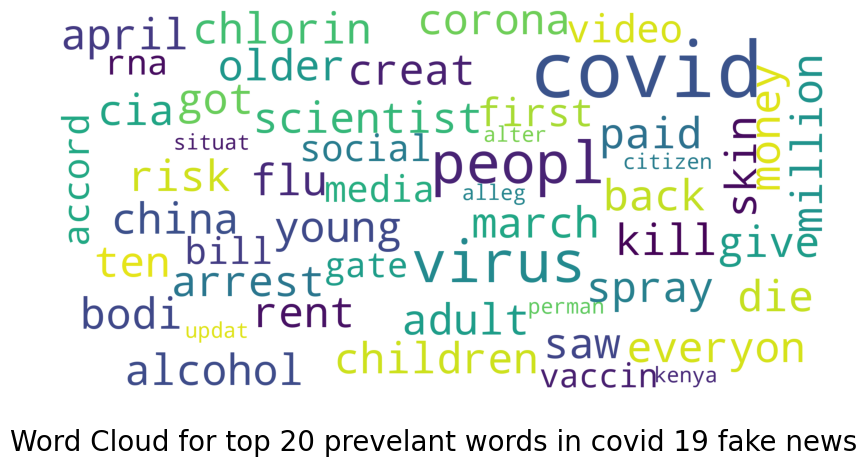

In [28]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(fake_data))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 20 prevelant words in covid 19 fake news', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

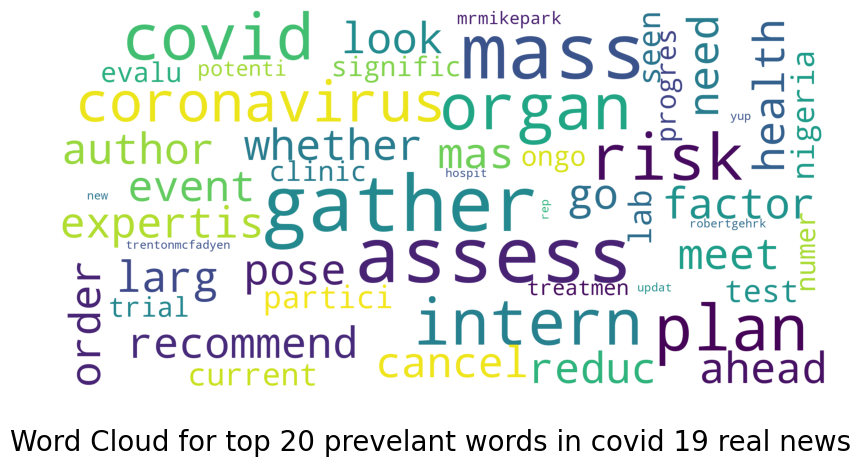

In [30]:
word_cloud = WordCloud(
                    background_color='white',
                    stopwords=set(STOPWORDS),
                    max_words=50,
                    max_font_size=40,
                    scale=5,
                    random_state=1).generate(str(true_data))
fig = plt.figure(1, figsize=(10,10))
plt.axis('off')
fig.suptitle('Word Cloud for top 20 prevelant words in covid 19 real news', fontsize=20)
fig.subplots_adjust(top=2.3)
plt.imshow(word_cloud)
plt.show()

In [36]:
from collections import Counter

import re
import string
import tldextract
from nltk.corpus import stopwords

def draw_bar_graph_for_text_visualization(df, label):
    tweets_from_loc = df.loc[df.label==label]
    
    loc_tweets_curated = tweets_from_loc['content'].tolist()
    loc_tweet_list = []
    
    # Divide text into individual words based on spaces
    for sublist in loc_tweets_curated:
        words = sublist.split()  # Split sublist into words based on spaces
        loc_tweet_list.extend(words)
    
    loc_tweet_count = Counter(loc_tweet_list)
    loc_top_30_words = pd.DataFrame(loc_tweet_count.most_common(50), columns=['word', 'count'])
    fig, ax = plt.subplots(figsize=(16, 6))
    sns.barplot(x='word', y='count', 
                data=loc_top_30_words, ax=ax)
    plt.title("Top 50 Prevalent Words in {}".format(label))
    plt.xticks(rotation='vertical')


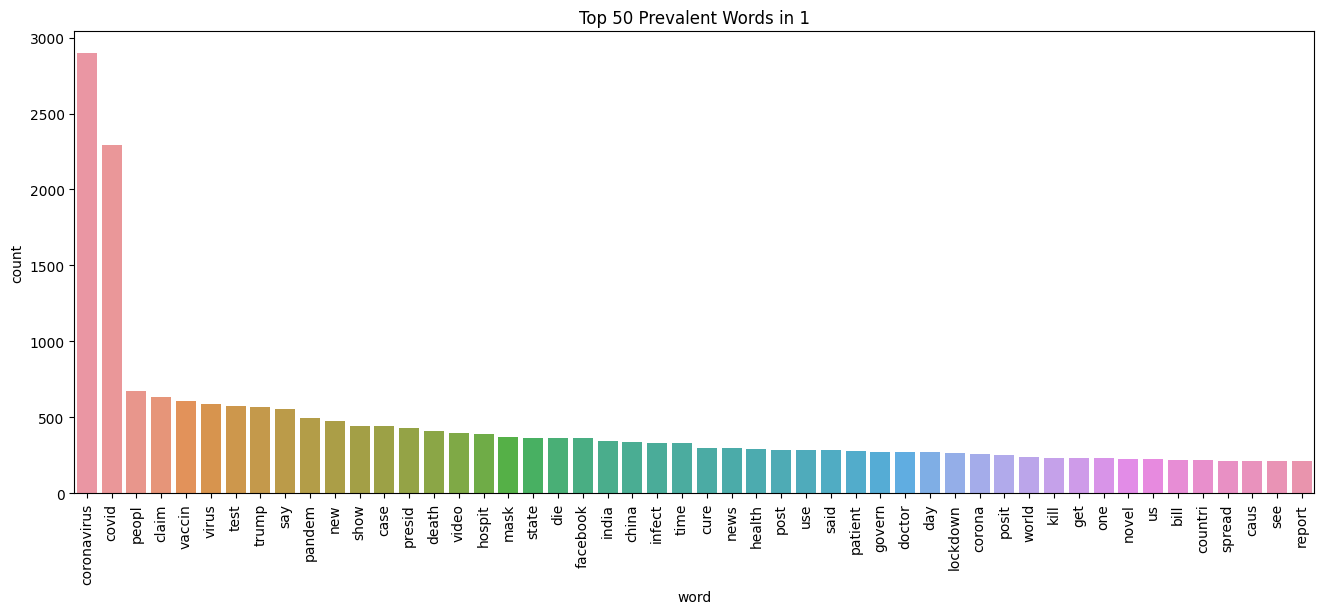

In [37]:
draw_bar_graph_for_text_visualization(df, 1)

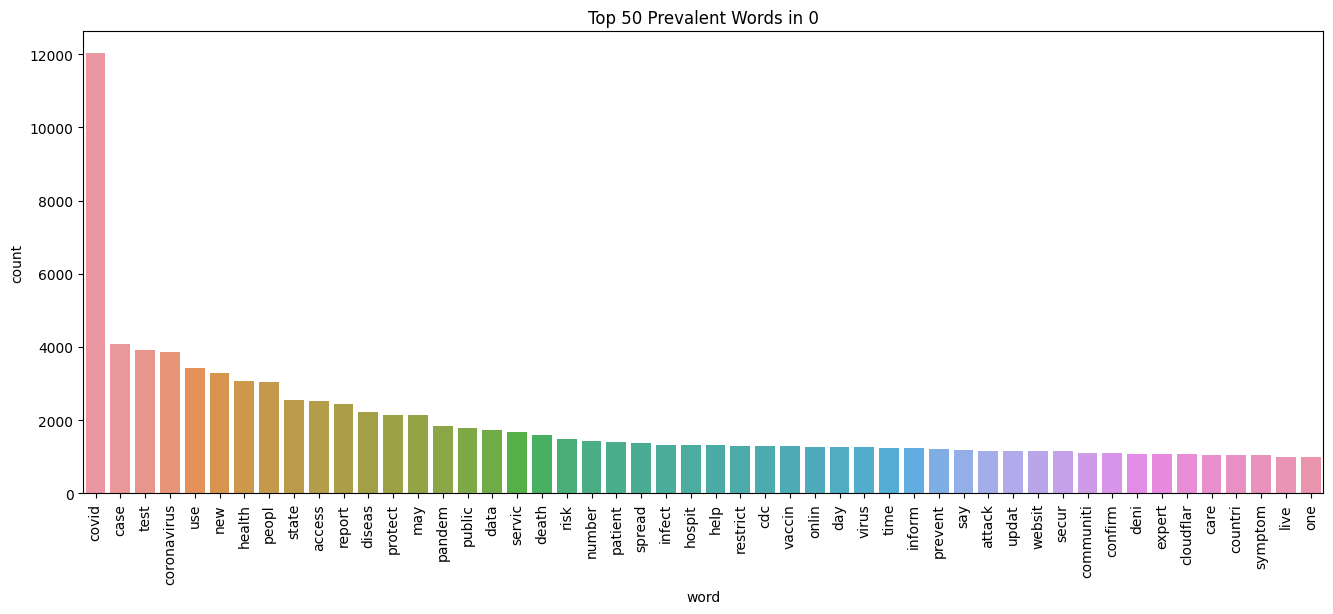

In [38]:
draw_bar_graph_for_text_visualization(df, 0)